In [1]:
import keras


Using TensorFlow backend.


# Dataset Preprocessing


### Einlesen der Daten aus dem JSON der BBL

In [2]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())
    print(json.dumps(games, indent=4, sort_keys=True))
    

{
    "competition": [
        {
            "@attributes": {
                "ID": "1",
                "title": "easyCredit BBL Hauptrunde"
            },
            "spiel": [
                {
                    "arenaLat": "49.77337",
                    "arenaLon": "9.93923",
                    "arenaName": "S.Oliver-Arena",
                    "bbl_spielID": "20826",
                    "datum": "2017-09-29",
                    "gast": "Brose Bamberg",
                    "gastCity": "Brose Bamberg",
                    "gast_id": "420",
                    "gast_result": "73",
                    "home": "s.Oliver W\u00fcrzburg",
                    "homeCity": "W\u00fcrzburg",
                    "home_id": "540",
                    "home_result": "76",
                    "init_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "live_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "spiel_nummer": "0",
                 

### Daten aufbereiten

#### Erstellen einer Liste für die Arenen & Teams

In [ ]:
arena=[]
home_ids=[]
for i in range(0,len(games['competition'][0]['spiel'])):
               
    if games['competition'][0]['spiel'][i]['home_id'] not in home_ids:
        arena.append(games['competition'][0]['spiel'][i]['arenaName'])
        home_ids.append(games['competition'][0]['spiel'][i]['home_id'])  
        
print(len(arena)) #Um sicher zu gehen, dass alle Arenen vorhanden sind
print(len(home_ids)) #Um sicher zu gehen, dass alle Teams vorhanden sind

### Dataset zusammenstellen 

In [3]:
dataset=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    
    dataset.append(datasetrow)

print(dataset)

[['540', '420', 1], ['422', '439', 1], ['483', '426', 0], ['418', '413', 0], ['477', '430', 0], ['421', '486', 0], ['432', '425', 0], ['428', '517', 1], ['413', '439', 0], ['420', '421', 1], ['426', '477', 1], ['483', '540', 0], ['425', '428', 1], ['486', '422', 0], ['517', '430', 0], ['415', '418', 1], ['439', '433', 0], ['413', '432', 1], ['517', '420', 0], ['477', '486', 0], ['418', '425', 0], ['428', '413', 0], ['430', '483', 1], ['540', '439', 1], ['432', '420', 0], ['422', '415', 0], ['421', '517', 0], ['433', '426', 1], ['426', '422', 1], ['430', '425', 0], ['477', '413', 0], ['486', '540', 0], ['483', '418', 1], ['433', '421', 0], ['432', '428', 1], ['415', '517', 1], ['425', '483', 0], ['418', '477', 1], ['413', '415', 1], ['422', '433', 0], ['428', '426', 0], ['486', '430', 1], ['421', '439', 1], ['540', '432', 1], ['421', '432', 0], ['413', '517', 1], ['422', '540', 1], ['477', '483', 1], ['415', '428', 0], ['433', '420', 1], ['430', '418', 1], ['439', '486', 0], ['426', '42

#### Umwandlung des Datasets in ein Numpy Array 

In [4]:
import numpy as np
# : -> auslesen aller zeilen
dataset=np.asarray(dataset)
print(dataset[:,0])
print(len(dataset))

['540' '422' '483' '418' '477' '421' '432' '428' '413' '420' '426' '483'
 '425' '486' '517' '415' '439' '413' '517' '477' '418' '428' '430' '540'
 '432' '422' '421' '433' '426' '430' '477' '486' '483' '433' '432' '415'
 '425' '418' '413' '422' '428' '486' '421' '540' '421' '413' '422' '477'
 '415' '433' '430' '439' '426' '418' '540' '486' '428' '483' '420' '425'
 '432' '517' '477' '422' '421' '432' '483' '439' '413' '426' '433' '420'
 '428' '418' '430' '425' '439' '415' '486' '517' '420' '477' '426' '430'
 '432' '421' '540' '415' '486' '439' '413' '486' '422' '425' '418' '433'
 '483' '517' '420' '428' '426' '540' '486' '432' '420' '421' '415' '425'
 '420' '439' '422' '418' '477' '433' '517' '430' '426' '483' '421' '418'
 '425' '428' '413' '540' '432' '422' '426' '517' '477' '420' '433' '483'
 '413' '540' '415' '418' '517' '439' '432' '428' '430' '425' '422' '477'
 '439' '421' '433' '430' '426' '428' '420' '421' '415' '430' '428' '439'
 '415' '517' '540' '413' '418' '421' '433' '432' '4

#### One hot encoding der Teams




In [5]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])

print(transformed_home_ids)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [6]:
transformed_gast_ids = encoder.transform(dataset[:,1]) #ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
print(transformed_gast_ids)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Zusammenfügen der Spalten home_ids, gast_ids,  win or loose

In [7]:
data=np.c_[transformed_home_ids,transformed_gast_ids,dataset[:,2]]
np.random.shuffle(data)
print(data)

[['0' '0' '0' ... '1' '0' '1']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '1']
 ...
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['1' '0' '0' ... '0' '0' '0']]


In [8]:
print(len(data[0])) #Anzahl der Neuronen
neuronen = len(data[0])-1

37


# Netz Modellierung

In [9]:
# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

adam = optimizers.Adam(lr=0.001) # lernrate

# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = neuronen, kernel_initializer = 'uniform', activation = 'relu', input_shape = (neuronen,)))

# Adding the second hidden layer
#regressor.add(Dense(units = 18, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Summary anzeigen
regressor.summary()

# Compiling the ANN - wie soll es lernen
regressor.compile(optimizer = adam, loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set 

history = regressor.fit(data[:,0:neuronen], data[:,neuronen], batch_size = 10, epochs = 100, validation_split = 0.3)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 37        
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________
Train on 214 samples, validate on 92 samples
Epoch 1/100
214/214 [==============================] - 0s 920us/step - loss: 0.2499 - acc: 0.4907 - val_loss: 0.2493 - val_acc: 0.5978
Epoch 2/100
214/214 [==============================] - 0s 214us/step - loss: 0.2487 - acc: 0.6776 - val_loss: 0.2485 - val_acc: 0.6413
Epoch 3/100
214/214 [==============================] - 0s 202us/step - loss: 0.2471 - acc: 0.7336 - val_loss: 0.2465 - val_acc: 0.6522
Epoch 4/100
214/214 [==============================] - 0s 214us/step - loss: 0.2441 - 

214/214 [==============================] - 0s 197us/step - loss: 0.1181 - acc: 0.8551 - val_loss: 0.2109 - val_acc: 0.7283
Epoch 57/100
214/214 [==============================] - 0s 192us/step - loss: 0.1170 - acc: 0.8505 - val_loss: 0.2111 - val_acc: 0.7283
Epoch 58/100
214/214 [==============================] - 0s 172us/step - loss: 0.1167 - acc: 0.8505 - val_loss: 0.2112 - val_acc: 0.7283
Epoch 59/100
214/214 [==============================] - 0s 164us/step - loss: 0.1152 - acc: 0.8505 - val_loss: 0.2116 - val_acc: 0.7283
Epoch 60/100
214/214 [==============================] - 0s 169us/step - loss: 0.1147 - acc: 0.8505 - val_loss: 0.2115 - val_acc: 0.7283
Epoch 61/100
214/214 [==============================] - 0s 165us/step - loss: 0.1133 - acc: 0.8551 - val_loss: 0.2126 - val_acc: 0.7283
Epoch 62/100
214/214 [==============================] - 0s 169us/step - loss: 0.1129 - acc: 0.8551 - val_loss: 0.2130 - val_acc: 0.7283
Epoch 63/100
214/214 [==============================] - 0s 16

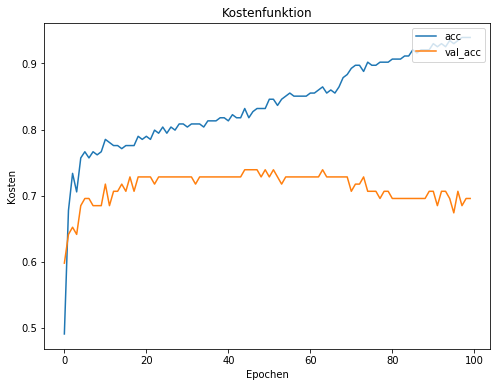

In [11]:
import matplotlib.pyplot as plt
#Accuracy Diagramm
handles = []

label, = plt.plot(history.history['acc'], label="acc")
handles.append(label)
label, = plt.plot(history.history['val_acc'], label="val_acc")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
plt.show()

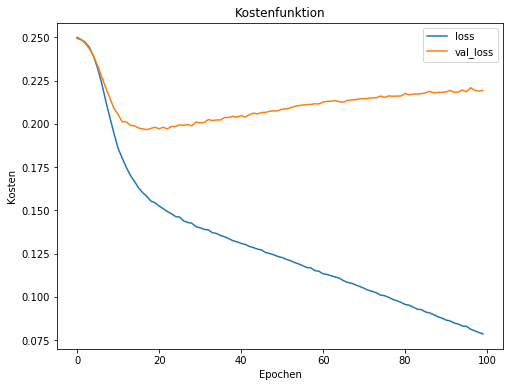

In [12]:
#Loss Diagramm
handles = []

label, = plt.plot(history.history['loss'], label="loss")
handles.append(label)
label, = plt.plot(history.history['val_loss'], label="val_loss")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('Kosten')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()

### Netz als Pickle Datei speichern

In [ ]:
import time as tm
import datetime
import pickle
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/' #Pfad muss angepasst werden
name_file= create_file_name()



In [ ]:
with open(path + name_file + '.pkl', 'wb') as output:
    ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss']}
    pickle.dump(ann_net, output)